In [1]:
!pip install pystac==1.6.1
!pip install pystac_client==0.5.0
!pip install stackstac==0.4.3
!pip install dask
!pip install "dask[diagnostics]" --upgrade

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
!git clone https://github.com/aliaksandr960/segment-anything-eo.git

# !pip install rasterio
# !pip install geopandas


!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

Cloning into 'segment-anything-eo'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 180 (delta 43), reused 133 (delta 13), pack-reused 0
Receiving objects: 100% (180/180), 27.95 MiB | 24.87 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 41.7 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
--2023-05-23 09:48:14--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfi

In [8]:
import stackstac

In [9]:
USER = 'spiruel'

In [34]:
import osgeo

ModuleNotFoundError: No module named 'osgeo'

In [31]:
import os
os.chdir(f'/home/{USER}/ESRIN-pixel-pioneers/segment-anything-eo')
!pip install opencv-python --quiet
!pip install matplotlib --quiet
#import cv2
import matplotlib.pyplot as plt
from sameo import SamEO

ModuleNotFoundError: No module named 'osgeo'

In [ ]:
!mv ../sam_vit* /content/segment-anything-eo/

In [ ]:
# Availble SamEO arguments:
# checkpoint="sam_vit_h_4b8939.pth",
# model_type='vit_h',
# device='cpu',
# erosion_kernel=(3, 3),
# mask_multiplier=255,
# sam_kwargs=None

# Availble sam_kwargs:
# points_per_side: Optional[int] = 32,
# points_per_batch: int = 64,
# pred_iou_thresh: float = 0.88,
# stability_score_thresh: float = 0.95,
# stability_score_offset: float = 1.0,
# box_nms_thresh: float = 0.7,
# crop_n_layers: int = 0,
# crop_nms_thresh: float = 0.7,
# crop_overlap_ratio: float = 512 / 1500,
# crop_n_points_downscale_factor: int = 1,
# point_grids: Optional[List[np.ndarray]] = None,
# min_mask_region_area: int = 0,
# output_mode: str = "binary_mask",

device = 'cuda:0'

sam_eo = SamEO(checkpoint="sam_vit_h_4b8939.pth",
               model_type='vit_h',
               device=device,
               erosion_kernel=(3, 3),
               mask_multiplier=255,
               sam_kwargs=None)

In [2]:
lon, lat = -93.18910568884452, 42.26592707690072 #-1.1330547635665225, 52.492388262661116 #-86.11336637425283, 40.91742389473447

In [10]:
import pystac_client
URL = "https://earth-search.aws.element84.com/v0"
catalog = pystac_client.Client.open(URL)

In [11]:
import shapely
#shapely.Polygon(iowa_poly_coords)

In [12]:
%%time

iowa_poly_coords = [
      [
        -96.63948406847706,
        40.37543881253006
      ],
      [
        -90.14005889983169,
        40.37543881253006
      ],
      [
        -90.14005889983169,
        43.501197343651384
      ],
      [
        -96.63948406847706,
        43.501197343651384
      ],
      [
        -96.63948406847706,
        40.37543881253006
      ]
  ]
#iowa_poly = dict(type="Polygon", coordinates=iowa_poly_coords),

items = catalog.search(
    intersects=shapely.Polygon(iowa_poly_coords),#dict(type="Point", coordinates=[lon, lat]),
    collections=["sentinel-s2-l2a-cogs"],
    datetime="2018-06-01/2018-07-01"
).get_all_items()
len(items)

CPU times: user 246 ms, sys: 653 µs, total: 246 ms
Wall time: 6.07 s


397

In [13]:
%time stack = stackstac.stack(items, epsg=32615, resolution=20)

CPU times: user 284 ms, sys: 0 ns, total: 284 ms
Wall time: 337 ms


/home/conda/spiruel/a86a059256482fa895e714360f4325a2c44f6cbd9ac01d5c10ef0f9dd46e0f10-20230523-094222-785236-161-pixelpioneers/lib/python3.9/site-packages/stackstac/prepare.py:363: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


In [14]:
stack

<xarray.DataArray 'stackstac-fc111db28d306d5b10ef5c2bf285d870' (time: 397,
                                                                band: 17,
                                                                y: 26177,
                                                                x: 36975)>
dask.array<fetch_raster_window, shape=(397, 17, 26177, 36975), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/27)
  * time                        (time) datetime64[ns] 2018-06-01T17:01:39 ......
    id                          (time) <U24 'S2A_15TXG_20180601_0_L2A' ... 'S...
  * band                        (band) <U8 'overview' 'B11' ... 'visual' 'SCL'
  * x                           (x) float64 8.518e+04 8.52e+04 ... 8.247e+05
  * y                           (y) float64 4.91e+06 4.91e+06 ... 4.387e+06
    proj:epsg                   (time) int64 32615 32615 32615 ... 32615 32615
    ...                          ...
    constellation               <U10 'sentinel-2'
    title                       (band) <U31 'True color image' ... 'Scene Cla...
    common_name                 (band) object None 'swir16' ... None None
    center_wavelength           (band) object None 1.6137 0.4439 ... None None
    full_width_half_max         (band) object None 0.143 0.027 ... None None
    epsg                        int64 32615
Attributes:
    spec:        RasterSpec(epsg=32615, bounds=(85180, 4386700, 824680, 49102...
    crs:         epsg:32615
    transform:   | 20.00, 0.00, 85180.00|\n| 0.00,-20.00, 4910240.00|\n| 0.00...
    resolution:  20

In [15]:
lowcloud = stack[stack["eo:cloud_cover"] < 20]
nir, red = lowcloud.sel(band="B08"), lowcloud.sel(band="B04")
ndvi = (nir - red) / (nir + red)
ndvi = ndvi.median("time", keep_attrs=True)

In [16]:
lowcloud = stack[stack["eo:cloud_cover"] < 20]
rgb = lowcloud.sel(band=["B04", "B03", "B02"])
monthly = rgb.median("time", keep_attrs=True) #.resample(time="MS").median("time", keep_attrs=True)

In [17]:
monthly

<xarray.DataArray 'stackstac-fc111db28d306d5b10ef5c2bf285d870' (band: 3,
                                                                y: 26177,
                                                                x: 36975)>
dask.array<nanmedian, shape=(3, 26177, 36975), dtype=float64, chunksize=(1, 291, 291), chunktype=numpy.ndarray>
Coordinates: (12/13)
  * band                    (band) <U8 'B04' 'B03' 'B02'
  * x                       (x) float64 8.518e+04 8.52e+04 ... 8.247e+05
  * y                       (y) float64 4.91e+06 4.91e+06 ... 4.387e+06
    gsd                     (band) object 10 10 10
    view:off_nadir          int64 0
    sentinel:latitude_band  <U1 'T'
    ...                      ...
    constellation           <U10 'sentinel-2'
    title                   (band) <U31 'Band 4 (red)' ... 'Band 2 (blue)'
    common_name             (band) object 'red' 'green' 'blue'
    center_wavelength       (band) object 0.6645 0.56 0.4966
    full_width_half_max     (band) object 0.038 0.045 0.098
    epsg                    int64 32615
Attributes:
    spec:        RasterSpec(epsg=32615, bounds=(85180, 4386700, 824680, 49102...
    crs:         epsg:32615
    transform:   | 20.00, 0.00, 85180.00|\n| 0.00,-20.00, 4910240.00|\n| 0.00...
    resolution:  20

In [18]:
import pyproj
x_utm, y_utm = pyproj.Proj(monthly.crs)(lon, lat)
buffer = 10000  # meters

In [19]:
aoi = monthly.loc[..., y_utm+buffer:y_utm-buffer, x_utm-buffer:x_utm+buffer]
aoi

<xarray.DataArray 'stackstac-fc111db28d306d5b10ef5c2bf285d870' (band: 3,
                                                                y: 1000, x: 1000)>
dask.array<getitem, shape=(3, 1000, 1000), dtype=float64, chunksize=(1, 291, 291), chunktype=numpy.ndarray>
Coordinates: (12/13)
  * band                    (band) <U8 'B04' 'B03' 'B02'
  * x                       (x) float64 4.744e+05 4.744e+05 ... 4.944e+05
  * y                       (y) float64 4.689e+06 4.689e+06 ... 4.669e+06
    gsd                     (band) object 10 10 10
    view:off_nadir          int64 0
    sentinel:latitude_band  <U1 'T'
    ...                      ...
    constellation           <U10 'sentinel-2'
    title                   (band) <U31 'Band 4 (red)' ... 'Band 2 (blue)'
    common_name             (band) object 'red' 'green' 'blue'
    center_wavelength       (band) object 0.6645 0.56 0.4966
    full_width_half_max     (band) object 0.038 0.045 0.098
    epsg                    int64 32615
Attributes:
    spec:        RasterSpec(epsg=32615, bounds=(85180, 4386700, 824680, 49102...
    crs:         epsg:32615
    transform:   | 20.00, 0.00, 85180.00|\n| 0.00,-20.00, 4910240.00|\n| 0.00...
    resolution:  20

In [20]:
import dask.diagnostics
with dask.diagnostics.ProgressBar():
    data = aoi.compute()

[########################################] | 100% Completed | 87.27 s


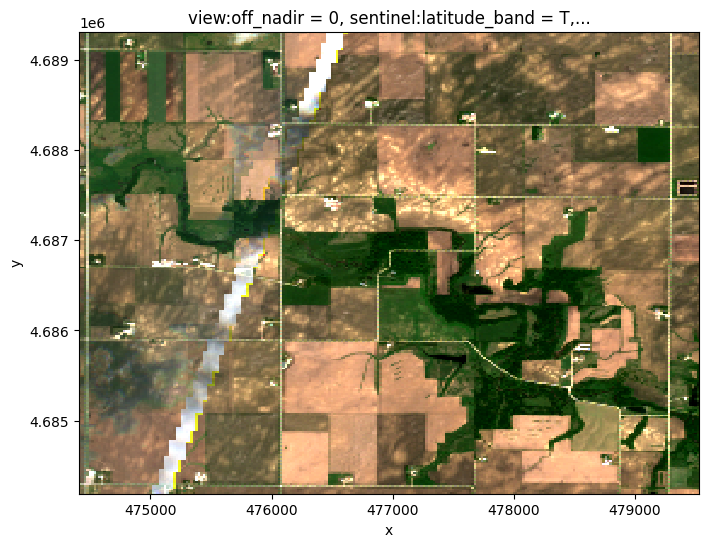

In [21]:
data[...,:256, :256].plot.imshow(rgb="band", robust=True, size=6);

In [22]:
def calculate_sample_grid(raster_h, raster_w, sample_h, sample_w, bound):

    h, w = sample_h, sample_w
    blocks = []
    height = h + 2 * bound
    width = w + 2 * bound

    for y in range(- bound, raster_h, h):
        for x in range(- bound, raster_w, w):

            rigth_x_bound = max(bound,
                                x + width - raster_w)
            bottom_y_bound = max(bound,
                                y + height - raster_h)

            blocks.append({'x': x,
                           'y': y,
                           'height': height,
                           'width': width,
                           'bounds':
                               [[bound, bottom_y_bound], [bound, rigth_x_bound]],
                           })
    return blocks

nbands, rh, rw = aoi.shape
sample_size = (512, 512)
sh, sw = sample_size
bound = 128

sample_grid = calculate_sample_grid(raster_h=rh, raster_w=rw, sample_h=sh, sample_w=sw, bound=bound)

In [23]:
len(sample_grid)

9

In [24]:
aoi.shape

(3, 1000, 1000)

NameError: name 'masked' is not defined

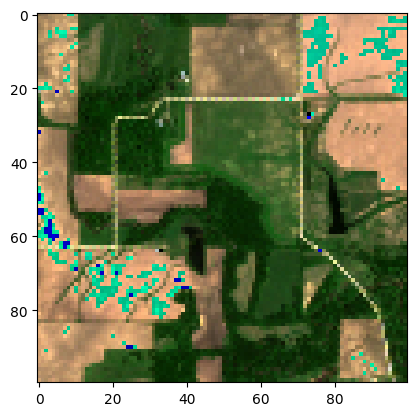

In [28]:
!pip install matplotlib --quiet
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(((data[:3,100:200,100:200].to_numpy().T/2000).clip(0,1)*256).astype(np.uint8))
plt.imshow(masked[100:200,100:200])

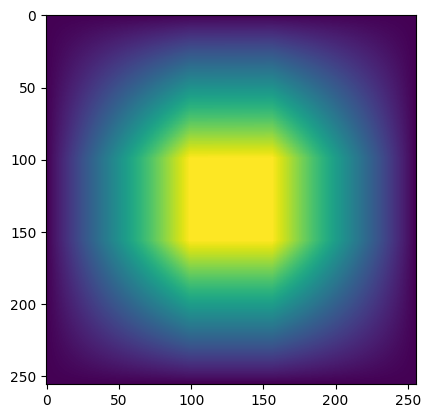

In [29]:
from typing import List, Optional, Tuple, Union

import numpy as np
def get_weights(shape: Tuple[int, int], buffer: Tuple[int, int], low: float = 0, high: float = 1) -> np.ndarray:
    """ Create weights array

    Function to create a numpy array of dimension, that outputs a linear gradient from low to high from the edges
    to the 2*buffer, and 1 elsewhere.
    """
    weight = np.ones(shape)
    weight[..., :2 * buffer[0]] = np.tile(np.linspace(low, high, 2 * buffer[0]), shape[0]).reshape(
        (shape[0], 2 * buffer[0]))
    weight[..., -2 * buffer[0]:] = np.tile(np.linspace(high, low, 2 * buffer[0]), shape[0]).reshape(
        (shape[0], 2 * buffer[0]))
    weight[:2 * buffer[1], ...] = weight[:2 * buffer[1], ...] * np.repeat(np.linspace(low, high, shape[1]),
                                                                          2 * buffer[1]).reshape(
        (2 * buffer[1], shape[1]))
    weight[-2 * buffer[1]:, ...] = weight[-2 * buffer[1]:, ...] * np.repeat(np.linspace(high, low, 2 * buffer[1]),
                                                                            shape[1]).reshape(
        (2 * buffer[1], shape[1]))
    return weight.astype(np.float32)

plt.imshow( get_weights(shape=(256,256), buffer=(50,50)))

In [30]:
import numpy as np

#chunk size, row num, col num
cs = 512
rn = 0
cn = 0

channels, width, height = data.shape
assert cs*rn+cs <= width
assert cs*cn+cs <= height

pred = sam_eo((((data[:3,cs*rn:cs*rn+cs,cs*cn:cs*cn+cs].to_numpy().T/2000).clip(0,1))*256).astype(np.uint8))
masked = np.ma.masked_where(pred == 0, pred)

plt.figure(figsize=(12,12))
plt.imshow(((data[:3,cs*rn:cs*rn+cs,cs*cn:cs*cn+cs].to_numpy().T/2000).clip(0,1)*256).astype(np.uint8))
plt.imshow(masked, alpha=.75)

NameError: name 'sam_eo' is not defined

In [ ]:
aoi[:3,cs*rn:cs*rn+cs,cs*cn:cs*cn+cs]#.transform

In [ ]:
!rm -rf predictions/*

In [ ]:
import glob
os.chdir('/content/segment-anything-eo/predictions')
files = glob.glob('*.tif')
files_str = ' '.join(files)
!gdal_merge.py -o ../merged.tif $files_str
os.chdir('/content/segment-anything-eo')

In [ ]:
files_str

In [ ]:
os.makedirs('predictions')

In [ ]:
import xarray as xr
import rasterio
from rasterio.transform import from_bounds
from tqdm import tqdm

# Get the shape of the xarray
channels, width, height = aoi.shape
# Define chunk size, row tot, and column tot
cs = 512
rn = width//cs
cn = height//cs

# Define the prediction function
def predict(chunk):
    # Perform prediction on the chunk, e.g. using sam_eo
    pred = sam_eo((((chunk[:3,:,:].to_numpy().T/2000).clip(0,1))*256).astype(np.uint8))
    return pred

# Iterate through each window
for r in tqdm(range(rn)):
    for c in tqdm(range(cn)):

        # Assert that the chunks fit within the xarray shape
        assert cs*r+cs <= width
        assert cs*c+cs <= height

        # Get the window bounds
        left = c * cs//2
        bottom = r * cs//2
        right = left + cs
        top = bottom + cs

        # Get the chunk for the current window
        import dask.diagnostics
        with dask.diagnostics.ProgressBar():
          chunk = aoi[:, bottom:top, left:right].compute()

        # Apply the prediction function to the chunk
        pred = predict(chunk)

        bbox = [float(min(chunk.x)), float(min(chunk.y)), float(max(chunk.x)), float(max(chunk.y))] #lower left, upper right
        transform = rasterio.transform.from_bounds(*bbox, width=cs, height=cs)


        # Save the prediction as a geotiff
        with rasterio.open('predictions/prediction_r{}_c{}_overlap.tif'.format(r, c), 'w', driver='GTiff', 
                           width=cs, height=cs, count=1, dtype=pred.dtype, transform=transform, crs=rasterio.crs.CRS({"init": f"epsg:{chunk.spec.epsg}"})) as dst:
            dst.write(pred.T, 1)
        print('saved', 'predictions/prediction_r{}_c{}_overlap.tif'.format(r, c))

In [ ]:
!zip -r output.zip predictions/* 

In [ ]:
chunk.plot.imshow(rgb='band', robust=True)

In [ ]:
plt.imshow((chunk.T/2000).clip(0,1))
pred = predict(chunk)
plt.imshow(pred, alpha=.1)

In [ ]:
float(chunk[...,0,0].x), float(chunk[...,0,-1].y)

In [ ]:
float(chunk[...,-1,-1].x), float(chunk[...,-1,0].y)

In [ ]:
%matplotlib inline

# Return the predicted values
img = ((aoi[:3,:512,:512].to_numpy().T/2000).clip(0,1)*256).astype(np.uint8)
#sam_eo.mask_generator.predictor.set_image(img)
plt.imshow(sam_eo(img))
plt.show()

In [ ]:
aoi[:3,:512,:512]

In [ ]:
chunk_sizes = {'band':3, 'x': sample_grid[0]['width'], 'y': sample_grid[0]['height']}

sam_eo.dask_chunk_window(aoi, chunk_sizes)


In [ ]:
import xarray as xr
import numpy as np

# Create example data
data = aoi #xr.DataArray(np.random.rand(200, 200), dims=('height', 'width'))

# Define the chunk size for each dimension
chunk_sizes = {'band':3, 'x': sample_grid[0]['width'], 'y': sample_grid[0]['height']}
data_chunked = data.chunk(chunk_sizes)#.unify_chunks()

# Define the machine learning prediction function
def predict(chunk):
    # Apply machine learning prediction to the chunk
    
    # Return the predicted values
    img = ((chunk.to_numpy().T/2000).clip(0,1)*256).astype(np.uint8)
    mask = sam_eo(img)

    return mask #chunk + 100*np.mean(chunk, axis=(1,2))

with dask.diagnostics.ProgressBar():
    # Apply the prediction function to each block
    result = data_chunked.map_blocks(predict, template=data_chunked).compute()

# Print the result
#print(result)

In [ ]:
data_chunked

In [ ]:
data.plot.imshow(rgb="band", robust=True, size=6);

In [ ]:
result.plot.imshow(rgb="band", robust=True, size=6);

In [ ]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip -qq install opencv-python matplotlib
!{sys.executable} -m pip -qq install 'git+https://github.com/facebookresearch/segment-anything.git'
    
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

!pip install -qq ipympl
from google.colab import output
output.enable_custom_widget_manager()
%matplotlib ipympl

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [ ]:
sam_checkpoint = "sam_vit_h_4b8939.pth"
device = "cuda"
model_type = "default"

import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [ ]:
image = ((aoi[:3,:512,:512].to_numpy().T/2000).clip(0,1)*256).astype(np.uint8)

predictor.set_image(image) # Generate initial predictions

In [ ]:
plt.close('all')

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')

def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    input_point = np.array([[int(ix), int(iy)]])
    input_label = np.array([1])
    masks, scores, logits = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True,
    )
    mask = masks[np.argmax(scores)]
    show_mask(mask, fig.gca(), random_color=True)
    show_points(input_point, input_label, fig.gca(), marker_size=100)

fig.set_size_inches(16, 9)
cid = fig.canvas.mpl_connect('button_press_event', onclick)
fig.tight_layout()